# Sentiment Analysis: Exploratory Analysis 
Morgan Gere

5/21/2022

As a continuation of an introduction into natural language processing.  Two texts will be imported into python.  The two texts are Harry Potter and the Philosophers Stone by J. K. Rowling obtained from Kaggle (https://www.kaggle.com/datasets/balabaskar/harry-potter-books-corpora-part-1-7) and Game of Thrones obtained from Kaggle (https://www.kaggle.com/datasets/khulasasndh/game-of-thrones-books).  Both books are of the fantasy genre, and both are the first of a series of books.  Harry Potter was written for children/adolescents while Game of Thrones was written for adults.

The texts will be cleaned and preprocessed followed by tokenized in such a way they can be used to find the part of speech tags.  The distribution of the tags will be obtained and used to compare the two texts.  These tags will be used to isolate adjective phrases, adverb phrases, and determiner noun phrases.  The top 50 from each book will be examined and compared.  The sentences containing these phrases will be isolated and an average word count per sentence will be found.  These will be compared to each other and the average sentence length of the entire book along with a comparison between the two books.  The top adjectives, adverbs, nouns, and verbs will be obtained and compared to thier phrases if applicable.  The top 10 will be selected and examined side by side incorporating frequency.  The last portion will be recommendation for sentiment analysis.

# Importing the texts.

Both books were read in from the downloaded file. 

In [93]:
# saving the path
hp_path = r'C:\Users\Morga\programsMG\NaturalLanguageProcessing\book1.txt'

# open the file
f = open(hp_path, 'r',encoding="utf8")

#reading the text saving it to a variable
hptext = f.read()

In [94]:
# saving the path
got_path = r'C:\Users\Morga\programsMG\NaturalLanguageProcessing\001ssb.txt'

# open the file
f = open(got_path, 'r',encoding="utf8")

#reading the text and saving it to a variable
gottext = f.read()

# Preprocessing / Cleaning

For Harry Potter the text was manually inspected and found to require preprocessing. There was code that needed to be removed, an example is \n for a new line. There were page numbers along with strange characters that appeared thoughout the text. Regular expressions were created to remove these.

In [95]:
import re

#Removing the \n
pattern = re.compile('\n')
hptext2=re.sub(pattern,'',hptext)

#removing Page | ### Harry Potter and the Philosophers Stone - J.K. Rowling
pattern2 = re.compile('Page \| [0-9][0-9]*[0-9]* Harry Potter and the Philosophers Stone - *J.K. Rowling')
hptext2=re.sub(pattern2,'',hptext2)

#removing this wierd k k k  and symbol k k k
pattern3 = re.compile('•k k k|k k k')
hptext2=re.sub(pattern3,'',hptext2)

After using regular expressions a few characters remained at the beginning of the book and the end of the book that were not being captured by regular expressions.  The text was converted to tokens and these characters (now tokens) were deleted manually.  The tokens were transformed back into text so that the sentence tokenizer could be used.  This was accomplished using the tree bank word detokenizer.

In [96]:
#tokenization
import nltk
hptokens = nltk.word_tokenize(hptext2)

In [97]:
#the last token is not from the book needs to be removed
del hptokens[101214]
print(hptokens[101200:])
#The first token is not from the book needs to be removed
del hptokens[0]
print(hptokens[:10])

['’', 'm', 'going', 'to', 'have', 'a', 'lot', 'of', 'fun', 'with', 'Dudley', 'this', 'summer', '...']
['THE', 'BOY', 'WHO', 'LIVED', 'Mr.', 'and', 'Mrs.', 'Dursley', ',', 'of']


In [98]:
#detokenization of HP text
from nltk.tokenize.treebank import TreebankWordDetokenizer
hptext3=TreebankWordDetokenizer().detokenize(hptokens)

For Game of Thrones after manual inspection of the text there were found to be the same issues that required preprocessing as the first book.  These were handled in the same way yet there were found to be many more than the Harry Potter text.  The same process of tokenizing and removal was used on patterns that were unable to be replicated in regular expressions.  This text was then detokenized in the same manor in order to use the sentence tokenizer.

In [99]:
#Removing the \n
pattern = re.compile('\n')
gottext2=re.sub(pattern,'',gottext)


## Removing page numbers and aurhtor from the pages along with some random numbers typed it the text
pattern2 = re.compile('[Pp]age [0-9][0-9]*[0-9]*')
gottext2=re.sub(pattern2,'',gottext2)

pattern3 = re.compile('1fm')
gottext2=re.sub(pattern3,"I'm",gottext2)

pattern4 = re.compile('m1ord')
gottext2=re.sub(pattern4,"mlord",gottext2)

pattern5 = re.compile('11 \*')
gottext2=re.sub(pattern5,"I'll",gottext2)

pattern6 = re.compile('Aerys 11 Targaryen')
gottext2=re.sub(pattern6,"Aerys II Targaryen",gottext2)

pattern7 = re.compile('Aegon 111')
gottext2=re.sub(pattern7,"Aegon III",gottext2)

pattern8 = re.compile('11IPm')
gottext2=re.sub(pattern8,"I'm",gottext2)

pattern9 = re.compile('CAME OF THRONES 119')
gottext2=re.sub(pattern9,"",gottext2)

pattern10 = re.compile('0')
gottext2=re.sub(pattern10,"o",gottext2)

pattern11 = re.compile('A GAM[EL],* OF THRON[LE]S [0-9][0-9]*[0-9]*')
gottext2=re.sub(pattern11,"of",gottext2)

pattern12 = re.compile('[0-9][0-9]*[0-9]* GLORG[LE] R.R. MARTIN')
gottext2=re.sub(pattern12,"of",gottext2)

pattern13 = re.compile('402 GEORGE R.R. MARUN')
gottext2=re.sub(pattern13,"",gottext2)

pattern14 = re.compile('11')
gottext2=re.sub(pattern14,"",gottext2)

pattern15 = re.compile('[0-9][0-9]*[0-9]* GEORGL R.R. MARTIN')
gottext2=re.sub(pattern15,"",gottext2)

pattern16 = re.compile('1')
gottext2=re.sub(pattern16,"I",gottext2)

pattern17 = re.compile('[0-9][0-9]*[0-9]* GEORGE R.R. MARTM')
gottext2=re.sub(pattern17,"",gottext2)

pattern18 = re.compile('1oo GLORGE R.R. MARTIN')
gottext2=re.sub(pattern18,"",gottext2)

pattern19 = re.compile('[0-9][0-9]*[0-9]* GEORGE RA. MARTIN')
gottext2=re.sub(pattern19,"",gottext2)

pattern20 = re.compile('[0-9][0-9]*[0-9]* GEORGE R.R. MARTIN')
gottext2=re.sub(pattern20,"",gottext2)

pattern21 = re.compile('[0-9][0-9]*[0-9]* GLORGL R.R. MARTIN')
gottext2=re.sub(pattern21,"",gottext2)

pattern22 = re.compile('A [CG]A[NM]4*[EL] OF THRON[EF]S [0-9][0-9]*[0-9]')
gottext2=re.sub(pattern22,"",gottext2)

pattern23 = re.compile('9\' ". . .')
gottext2=re.sub(pattern23,"",gottext2)

pattern24 = re.compile('[0-9][0-9]*[0-9]* GEORGE R.R. MARUN')
gottext2=re.sub(pattern24,"",gottext2)

pattern25 = re.compile('A GAME OF TFIRONES 535')
gottext2=re.sub(pattern25,"",gottext2)

pattern26 = re.compile('[0-9][0-9]*[0-9]* GLORGL R.R. MARTIN')
gottext2=re.sub(pattern26,"",gottext2)

pattern27 = re.compile('26o GLORGL R.R. MARTIN')
gottext2=re.sub(pattern27,"",gottext2)

pattern28 = re.compile('ofo[0-9]')
gottext2=re.sub(pattern28,"",gottext2)

pattern29 = re.compile('m7ord')
gottext2=re.sub(pattern29,"mlord",gottext2)

pattern30 = re.compile('4o ')
gottext2=re.sub(pattern30,"",gottext2)

pattern31 = re.compile('Red4yne')
gottext2=re.sub(pattern31,"Redyne",gottext2)

pattern32 = re.compile('65o GLORGL R.R. MARTIN')
gottext2=re.sub(pattern32,"",gottext2)

pattern33 = re.compile('Red4yne')
gottext2=re.sub(pattern33,"Redyne",gottext2)

pattern34 = re.compile("A GAME OF 'FHRONES 679")
gottext2=re.sub(pattern34,"",gottext2)

pattern35 = re.compile(" I 9")
gottext2=re.sub(pattern35,"",gottext2)

pattern36=re.compile("\'\'")
gottext2=re.sub(pattern36,"",gottext2)

In [100]:
#tokenization
gottokens = nltk.word_tokenize(gottext2)

In [101]:
# creating a loop to manually remove an unwanted token.
fixedgottokesn =[]
for token in gottokens:
    if token == "``":
        continue
    else:
        fixedgottokesn.append(token)

In [102]:
# creating a loop to manually remove an unwanted token.
fixedgottokesn2 =[]
for token in fixedgottokesn:
    if token == "''":
        continue
    else:
        fixedgottokesn2.append(token)

In [103]:
#detokenization of got text
from nltk.tokenize.treebank import TreebankWordDetokenizer
gottext3=TreebankWordDetokenizer().detokenize(fixedgottokesn2)

# Tokenization/POS Tagging

The text was broken into sentences using the nltk sentence tokenizer.  A loop was used that took each sentence (now a token) and placed it though the nltk word tokenizer and placed the list of tokens into a new list.  This was done for each book giving two lists of lists filled with tokens.

In [104]:
#sentence tokenization
got_sent_toke = nltk.sent_tokenize(gottext3)

In [105]:
#word tokenization inside each tokenized sentence
got_toke = []
for sent in got_sent_toke:
    x = nltk.word_tokenize(sent)
    got_toke.append(x)

In [106]:
#sentence tokenization
hp_sent_toke = nltk.sent_tokenize(hptext3)

In [107]:
#word tokenization inside each tokenized sentence
hp_toke = []
for sent in hp_sent_toke:
    x = nltk.word_tokenize(sent)
    hp_toke.append(x)

For each list of lists of tokens, each sentence token was placed into the nltk pos tagger and each word token was tagged with its part of speech.  The word token was placed into a tuple along with its tag.  The tuples were added to a list and the list of tuples was placed into another list.  This keeps the sentence structure and the structure of the book the same resulting in a list of lists of tuples that contain the word token and its part of speech tag.  

In [108]:
## POS Tagging, to retrieve adjective (JJs) and adverb (RBs) tags

# use the Stanford POS tagger to POS tag tokens of each sentence
# this is the default tagger in nltk
tagged_got_text = [nltk.pos_tag(tokens) for tokens in got_toke]
print(tagged_got_text[:2])

[[('A', 'DT'), ('Game', 'NNP'), ('Of', 'IN'), ('Thrones', 'NNP'), ('Book', 'NNP'), ('One', 'NNP'), ('of', 'IN'), ('A', 'NNP'), ('Song', 'NNP'), ('of', 'IN'), ('Ice', 'NNP'), ('and', 'CC'), ('Fire', 'NNP'), ('By', 'IN'), ('George', 'NNP'), ('R.', 'NNP'), ('R.', 'NNP'), ('Martin', 'NNP'), ('PROLOGUE', 'NNP'), ('We', 'PRP'), ('should', 'MD'), ('start', 'VB'), ('back', 'RB'), (',', ','), ('Gared', 'NNP'), ('urged', 'VBD'), ('as', 'IN'), ('the', 'DT'), ('woods', 'NNS'), ('began', 'VBD'), ('to', 'TO'), ('grow', 'VB'), ('dark', 'NN'), ('around', 'IN'), ('them', 'PRP'), ('.', '.')], [('The', 'DT'), ('wildlings', 'NNS'), ('are', 'VBP'), ('dead', 'JJ'), ('.', '.')]]


In [109]:
## POS Tagging, to retrieve adjective (JJs) and adverb (RBs) tags

# use the Stanford POS tagger to POS tag tokens of each sentence
# this is the default tagger in nltk
tagged_hp_text = [nltk.pos_tag(tokens) for tokens in hp_toke]
print(tagged_hp_text[:2])

[[('THE', 'DT'), ('BOY', 'NNP'), ('WHO', 'NNP'), ('LIVED', 'NNP'), ('Mr.', 'NNP'), ('and', 'CC'), ('Mrs.', 'NNP'), ('Dursley', 'NNP'), (',', ','), ('of', 'IN'), ('number', 'NN'), ('four', 'CD'), (',', ','), ('Privet', 'NNP'), ('Drive', 'NNP'), (',', ','), ('were', 'VBD'), ('proud', 'JJ'), ('to', 'TO'), ('say', 'VB'), ('that', 'IN'), ('they', 'PRP'), ('were', 'VBD'), ('perfectly', 'RB'), ('normal', 'JJ'), (',', ','), ('thank', 'NN'), ('you', 'PRP'), ('very', 'RB'), ('much', 'RB'), ('.', '.')], [('They', 'PRP'), ('were', 'VBD'), ('the', 'DT'), ('last', 'JJ'), ('people', 'NNS'), ('you', 'PRP'), ('’', 'VBP'), ('d', 'JJ'), ('expect', 'VBP'), ('to', 'TO'), ('be', 'VB'), ('involved', 'VBN'), ('in', 'IN'), ('anything', 'NN'), ('strange', 'JJ'), ('or', 'CC'), ('mysterious', 'JJ'), (',', ','), ('because', 'IN'), ('they', 'PRP'), ('just', 'RB'), ('didn', 'VBP'), ('’', 'JJ'), ('t', 'NN'), ('hold', 'NN'), ('with', 'IN'), ('such', 'JJ'), ('nonsense', 'NN'), ('.', '.')]]


# POS tagging understanding

In order to have a written-out explanation of each part of speech (POS) tag and be able to see which tags were present in the list of lists of tuples. A function was created that pulled the tag and added it to a list if it was not already present in the list.  This list was then used in a loop that replaced the tag with the same tag name and a brief explanation and possible example.  This function was then used on each list of lists of tuples, this shows that there is punctuation remaining and in fact all the tag types were used.

In [110]:
def unq_pos(list):
    unq = []
    for sent in list:
        for key , value in sent:
            x = value
            if x in unq:
                continue
            else:
                unq.append(x)
    unq2 =[]
    for item in unq:
        if item == 'CC':
            item = 'CC ,coordinating conjunction'
        elif item == 'CD':
            item = 'CD, cardinal digit'
        elif item == 'DT':
            item= 'DT,determiner'
        elif item == 'EX':
            item = 'EX, existential there'
        elif item == 'FW':
            item = 'FW , foreign word'
        elif item == 'IN':
            item = 'IN, preposition/subordinating conjunction'
        elif item == 'JJ':
            item = 'JJ, This NLTK POS Tag is an adjective (large)'
        elif item == 'JJR':
            item = 'JJR, adjective, comparative (larger)'
        elif item == 'JJS':
            item= 'JJS, adjective, superlative (largest)'
        elif item == 'LS':
            item = 'LS, list market'
        elif item == 'MD':
            item = 'MD, modal (could, will)'
        elif item == 'NN':
            item = 'NN, noun, singular (cat, tree)'
        elif item == 'NNS':
            item = 'NNS, noun plural (desks)'
        elif item == 'NNP':
            item = 'NNP, proper noun, singular (sarah)'
        elif item == 'NNPS':
            item = 'NNPS, proper noun, plural (indians or americans)'
        elif item == 'PDT':
            item = 'PDT, predeterminer (all, both, half)'
        elif item == 'POS':
            item = 'POS, possessive ending (parent\ ‘s)'
        elif item == 'PRP':
            item = 'PRP, personal pronoun (hers, herself, him, himself)'
        elif item == 'PRP$':
            item = 'PRP$, possessive pronoun (her, his, mine, my, our)'
        elif item == 'RB':
            item ='RB, adverb (occasionally, swiftly)'
        elif item == 'RBR':
            item = 'RBR, adverb, comparative (greater)'
        elif item == 'RBS':
            item = 'RBS, adverb, superlative (biggest)'
        elif item == 'RP':
            item = 'RP, particle (about)'
        elif item == 'TO':
            item = 'TO, infinite marker (to)'
        elif item == 'UH':
            item = 'UH, interjection (goodbye)'
        elif item == 'VB':
            item = 'VB, verb (ask)'
        elif item == 'VBG':
            item = 'VBG, verb gerund (judging)'
        elif item == 'VBD':
            item = 'VBD, verb past tense (pleaded)'
        elif item == 'VBN':
            item = 'VBN, verb past participle (reunified)'
        elif item == 'VBP':
            item = 'VBP, verb, present tense not 3rd person singular(wrap)'
        elif item == 'VBZ':
            item = 'VBZ, verb, present tense with 3rd person singular (bases)'
        elif item == 'WDT':
            item = 'WDT, wh-determiner (that, what)'
        elif item == 'WP':
            item  = 'WP, wh- pronoun (who)'
        elif item == 'WRB':
            item = 'WRB, wh- adverb (how)'
        elif item == 'WP$':
            item = 'WP$, possessive wh-pronoun. Example: whos'
        unq2.append(item)
    return unq2

In [111]:
got_unq_tags = unq_pos(tagged_got_text)
got_unq_tags

['DT,determiner',
 'NNP, proper noun, singular (sarah)',
 'IN, preposition/subordinating conjunction',
 'CC ,coordinating conjunction',
 'PRP, personal pronoun (hers, herself, him, himself)',
 'MD, modal (could, will)',
 'VB, verb (ask)',
 'RB, adverb (occasionally, swiftly)',
 ',',
 'VBD, verb past tense (pleaded)',
 'NNS, noun plural (desks)',
 'TO, infinite marker (to)',
 'NN, noun, singular (cat, tree)',
 '.',
 'VBP, verb, present tense not 3rd person singular(wrap)',
 'JJ, This NLTK POS Tag is an adjective (large)',
 'VBN, verb past participle (reunified)',
 'VBZ, verb, present tense with 3rd person singular (bases)',
 'WP, wh- pronoun (who)',
 'WDT, wh-determiner (that, what)',
 'PRP$, possessive pronoun (her, his, mine, my, our)',
 'VBG, verb gerund (judging)',
 'POS, possessive ending (parent\\ ‘s)',
 'EX, existential there',
 'RP, particle (about)',
 'CD, cardinal digit',
 'RBR, adverb, comparative (greater)',
 'JJR, adjective, comparative (larger)',
 ':',
 'PDT, predeterminer

In [112]:
hp_unq_tags = unq_pos(tagged_hp_text)
hp_unq_tags

['DT,determiner',
 'NNP, proper noun, singular (sarah)',
 'CC ,coordinating conjunction',
 ',',
 'IN, preposition/subordinating conjunction',
 'NN, noun, singular (cat, tree)',
 'CD, cardinal digit',
 'VBD, verb past tense (pleaded)',
 'JJ, This NLTK POS Tag is an adjective (large)',
 'TO, infinite marker (to)',
 'VB, verb (ask)',
 'PRP, personal pronoun (hers, herself, him, himself)',
 'RB, adverb (occasionally, swiftly)',
 '.',
 'NNS, noun plural (desks)',
 'VBP, verb, present tense not 3rd person singular(wrap)',
 'VBN, verb past participle (reunified)',
 'WDT, wh-determiner (that, what)',
 'PRP$, possessive pronoun (her, his, mine, my, our)',
 'VBG, verb gerund (judging)',
 'EX, existential there',
 'JJS, adjective, superlative (largest)',
 'MD, modal (could, will)',
 ':',
 'VBZ, verb, present tense with 3rd person singular (bases)',
 'WP, wh- pronoun (who)',
 'NNPS, proper noun, plural (indians or americans)',
 'WRB, wh- adverb (how)',
 'RP, particle (about)',
 'RBS, adverb, super

# Percentage of each text by POS Tag

To see the distribution of POS tags in the total text, a function was created that takes a POS tag and the list of lists of tuples and returns the count for that POS tag.  A loop was used to return the unique POS tags from the total text.  Using a loop, the list of unique POS tags was run through the function to give a list of the frequency of each POS tag.  This list was then converted into percentages.  The unique POS list and the percentage of frequency was placed into a dictionary then placed back into a list to sort it by the value and placed back into a dictionary.  Using this sorted dictionary, a graph was created to see the distribution of POS tags by percentage.

In [113]:
#creating a function to find the count of a pos tag from the token list
def pos_count(POS,taggedsentlist):
    count = []
    for sent in taggedsentlist:
        for key , value in sent:
            x = value
            if x == POS:
                count.append(x)
            else:
                continue
        
    return len(count)

In [114]:
#creating a list of the pos tags from GoT and placing them into a list.
gotunq = []
for sent in tagged_got_text:
    for key , value in sent:
        x = value
        if x in gotunq:
            continue
        else:
            gotunq.append(x)
print(gotunq)

['DT', 'NNP', 'IN', 'CC', 'PRP', 'MD', 'VB', 'RB', ',', 'VBD', 'NNS', 'TO', 'NN', '.', 'VBP', 'JJ', 'VBN', 'VBZ', 'WP', 'WDT', 'PRP$', 'VBG', 'POS', 'EX', 'RP', 'CD', 'RBR', 'JJR', ':', 'PDT', 'JJS', 'RBS', 'WRB', 'UH', 'NNPS', 'WP$', "''", 'FW', '(', ')', '``']


In [115]:
# using a loop to run each tag from the GoT tag list through the function to aquire the counts
got_pos_count= []
for item in gotunq:
    x=pos_count(item,tagged_got_text)
    got_pos_count.append(x)
print(got_pos_count)

[29363, 22599, 29600, 10989, 26794, 5070, 11757, 15628, 21040, 26255, 12598, 6546, 41730, 27230, 4873, 14615, 6484, 3494, 1293, 508, 11275, 4685, 2270, 541, 1929, 1464, 401, 836, 556, 354, 422, 61, 1947, 256, 78, 28, 44, 6, 8, 7, 3]


In [116]:
#converting the count list to percent
total_got_pos_count=sum(got_pos_count)


got_pos_perc = []
for item in got_pos_count:
    x=round(((item/total_got_pos_count)*100),5)
    got_pos_perc.append(x)
    
print(got_pos_perc)

[8.49533, 6.53836, 8.5639, 3.17935, 7.75206, 1.46686, 3.40155, 4.52151, 6.08731, 7.59612, 3.64486, 1.89389, 12.07336, 7.87821, 1.40986, 4.22842, 1.87596, 1.01089, 0.37409, 0.14698, 3.26209, 1.35547, 0.65676, 0.15652, 0.5581, 0.42357, 0.11602, 0.24187, 0.16086, 0.10242, 0.12209, 0.01765, 0.56331, 0.07407, 0.02257, 0.0081, 0.01273, 0.00174, 0.00231, 0.00203, 0.00087]


In [117]:
#creating a function to take two lists and creat a dictionary.
def dict_creator(keys, values):
    return dict(zip(keys, values))

In [118]:
# Creating a dictionary where the keys are the POS tags and the values are thier frequncies
got_dict_count=dict_creator(gotunq,got_pos_perc)
got_dict_count
#Placing the dict into a list and sorting by valuse then placing it back into a dictionary
got_dict_count_list = sorted(got_dict_count.items(), key=lambda x:x[1],reverse=True)
got_dict_count_2 = dict(got_dict_count_list)
print(got_dict_count_2)

{'NN': 12.07336, 'IN': 8.5639, 'DT': 8.49533, '.': 7.87821, 'PRP': 7.75206, 'VBD': 7.59612, 'NNP': 6.53836, ',': 6.08731, 'RB': 4.52151, 'JJ': 4.22842, 'NNS': 3.64486, 'VB': 3.40155, 'PRP$': 3.26209, 'CC': 3.17935, 'TO': 1.89389, 'VBN': 1.87596, 'MD': 1.46686, 'VBP': 1.40986, 'VBG': 1.35547, 'VBZ': 1.01089, 'POS': 0.65676, 'WRB': 0.56331, 'RP': 0.5581, 'CD': 0.42357, 'WP': 0.37409, 'JJR': 0.24187, ':': 0.16086, 'EX': 0.15652, 'WDT': 0.14698, 'JJS': 0.12209, 'RBR': 0.11602, 'PDT': 0.10242, 'UH': 0.07407, 'NNPS': 0.02257, 'RBS': 0.01765, "''": 0.01273, 'WP$': 0.0081, '(': 0.00231, ')': 0.00203, 'FW': 0.00174, '``': 0.00087}


In [119]:
#creating a list of the pos tags from GoT and placing them into a list.
hpunq = []
for sent in tagged_hp_text:
    for key , value in sent:
        x = value
        if x in hpunq:
            continue
        else:
            hpunq.append(x)
print(hpunq)

['DT', 'NNP', 'CC', ',', 'IN', 'NN', 'CD', 'VBD', 'JJ', 'TO', 'VB', 'PRP', 'RB', '.', 'NNS', 'VBP', 'VBN', 'WDT', 'PRP$', 'VBG', 'EX', 'JJS', 'MD', ':', 'VBZ', 'WP', 'NNPS', 'WRB', 'RP', 'RBS', 'PDT', 'JJR', 'UH', 'RBR', '(', ')', 'FW', "''", '``', 'WP$', 'POS']


In [120]:
# using a loop to run each tag from the GoT tag list through the function to aquire the counts
hp_pos_count= []
for item in hpunq:
    x=pos_count(item,tagged_hp_text)
    hp_pos_count.append(x)
print(hp_pos_count)

[6780, 10611, 2539, 5658, 8342, 13364, 557, 7724, 6218, 1859, 3209, 7406, 5042, 6446, 2945, 2422, 1547, 236, 1650, 2089, 205, 117, 743, 369, 1283, 558, 38, 486, 754, 21, 109, 189, 59, 85, 30, 31, 58, 12, 9, 3, 2]


In [121]:
#converting the count list to percent
total_hp_pos_count=sum(hp_pos_count)

hp_pos_perc = []
for item in hp_pos_count:
    x=round(((item/total_hp_pos_count)*100),5)
    hp_pos_perc.append(x)
    
print(hp_pos_perc)

[6.65979, 10.42287, 2.49398, 5.55768, 8.1941, 13.12706, 0.54712, 7.58705, 6.10776, 1.82604, 3.1521, 7.27469, 4.95261, 6.33171, 2.89279, 2.37906, 1.51957, 0.23182, 1.62075, 2.05196, 0.20137, 0.11493, 0.72983, 0.36246, 1.26025, 0.54811, 0.03733, 0.47738, 0.74063, 0.02063, 0.10707, 0.18565, 0.05795, 0.08349, 0.02947, 0.03045, 0.05697, 0.01179, 0.00884, 0.00295, 0.00196]


In [122]:
# Creating a dictionary where the keys are the POS tags and the values are thier frequncies
hp_dict_count=dict_creator(hpunq,hp_pos_perc)
hp_dict_count
#Placing the dict into a list and sorting by valuse then placing it back into a dictionary
hp_dict_count_list = sorted(hp_dict_count.items(), key=lambda x:x[1],reverse=True)
hp_dict_count_2 = dict(hp_dict_count_list)
print(hp_dict_count_2)

{'NN': 13.12706, 'NNP': 10.42287, 'IN': 8.1941, 'VBD': 7.58705, 'PRP': 7.27469, 'DT': 6.65979, '.': 6.33171, 'JJ': 6.10776, ',': 5.55768, 'RB': 4.95261, 'VB': 3.1521, 'NNS': 2.89279, 'CC': 2.49398, 'VBP': 2.37906, 'VBG': 2.05196, 'TO': 1.82604, 'PRP$': 1.62075, 'VBN': 1.51957, 'VBZ': 1.26025, 'RP': 0.74063, 'MD': 0.72983, 'WP': 0.54811, 'CD': 0.54712, 'WRB': 0.47738, ':': 0.36246, 'WDT': 0.23182, 'EX': 0.20137, 'JJR': 0.18565, 'JJS': 0.11493, 'PDT': 0.10707, 'RBR': 0.08349, 'UH': 0.05795, 'FW': 0.05697, 'NNPS': 0.03733, ')': 0.03045, '(': 0.02947, 'RBS': 0.02063, "''": 0.01179, '``': 0.00884, 'WP$': 0.00295, 'POS': 0.00196}


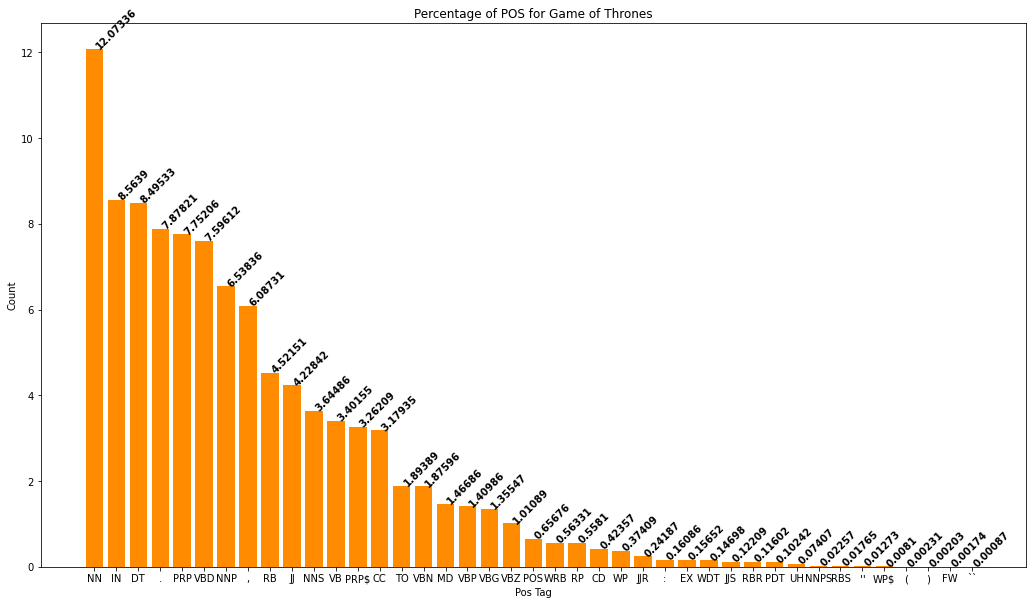

In [123]:
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i],fontweight = 'bold',rotation=45)


values =  list(got_dict_count_2.values())
names = list(got_dict_count_2.keys())

plt.figure(figsize=(60, 10))

plt.subplot(131)
plt.bar(names,values, color = 'darkorange')
plt.ylabel('Count')
plt.xlabel('Pos Tag')
plt.title('Percentage of POS for Game of Thrones')
addlabels(values)
plt.show()

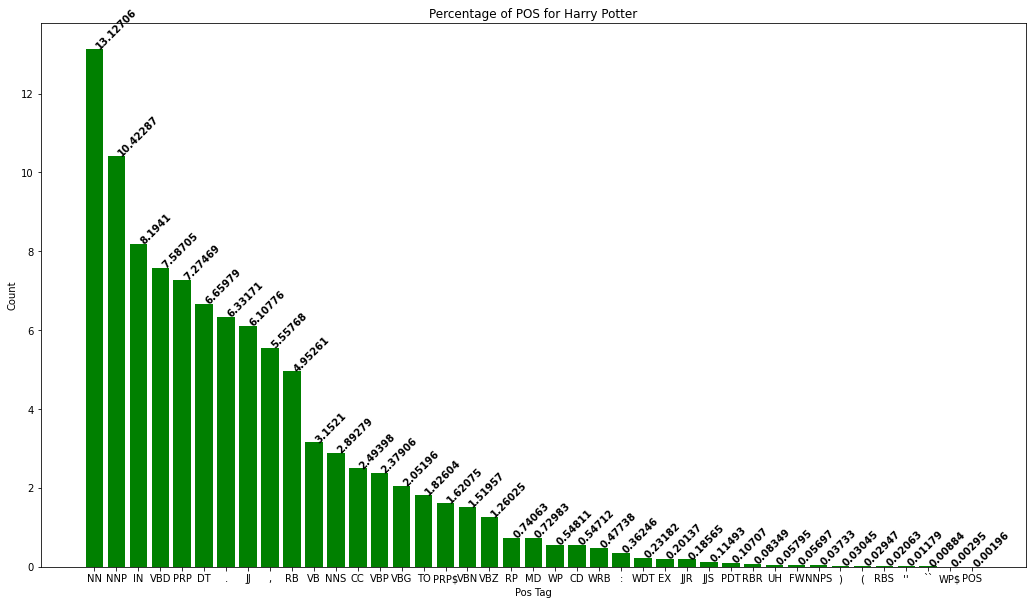

In [124]:
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i],fontweight = 'bold',rotation=45)


values =  list(hp_dict_count_2.values())
names = list(hp_dict_count_2.keys())

plt.figure(figsize=(60, 10))

plt.subplot(131)
plt.bar(names,values,color='green')
plt.ylabel('Count')
plt.xlabel('Pos Tag')
plt.title('Percentage of POS for Harry Potter')
addlabels(values)
plt.show()

The percentages of tags between the two books are found to be very different.  While both start with NN (noun singular) Harry potter then goes to NNP (proper noun) and Game of Thrones goes to IN (preposition/subordinating conjunction).  In fact, NNP on Game of Thrones was the 7th in line which is a big difference.  This change could be explained by the use of spells in the Harry Potter which would be tagged as proper nouns.  The use of DT (determiners) was also quite different.  They were found to be used much more in Game of Thrones.  With a little knowledge this is understandable.  There are many titles in Game of thrones, a good example is “the hand of the king”.  These titles will be prefaced with a determiner and are used often instead of names.  Another interesting difference is the PRP (Personal pronoun) which is very low in Harry Potter vs Game of Thrones.  This actually makes sense because Harry Potter is 1st person along with narration while Game of Thrones is written from multiple character viewpoints.

# Top adjective phrases 

The code from the code suggestions was used and slightly altered to give its results for each book using the list of lists of tuples.  It worked by using the regular expressions to isolate the POS tags where two tags are in a row.  The first tag will consist of either RB (Adverb), RBR (adverb comparative), or RBS (adverb superlative) followed by JJ (adjective), JJR (adjective comparative), JJS (adjective superlative).  These two tokens together are an “adjective phrase”.   Using the adjective phrases the frequency was found and the top 50 most common are displayed.  Lastly it shows how many sentences of the entire book contain an adjective phrase.   

In [125]:
# Following our NLTK textbook, chapter on Information Extraction--Chunking (https://www.nltk.org/book/ch07.html)

# Using CHUNKING to parse sentences 
# to look for "adjective phrases", i.e. phrases (or chunks) that have adverbs and adjectives ('RB'+'JJ')
# First step: writing a grammar that defines the POS in the chunk
# we name this grammar "ADJPH" ("ADJective PHrase") using regexes 

import re
grammar_adjph = "ADJPH: {<RB.?>+<JJ.?>}"
# This regex reads as: "find groups ("< >") of RBs (adverbs) together with groups of JJs (adjectives), with groups defineds as
# RBs with any ending (the "." is a placeholder or wildcard for the "R" and the "S" at the end of RBR and RBS, 
# while "?" indicates "optional character" so RB can be found alone as well). Same regex operators apply to JJs.

# Second step: import the nltk parser to process each sentence
chunk_parser_adj = nltk.RegexpParser(grammar_adjph)

got_adjph_tags = []
for sent in tagged_got_text:
    if len(sent) > 0:
        tree = chunk_parser_adj.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'ADJPH':
                got_adjph_tags.append(subtree)
                
# Visualizing the actual adjective phrase
got_adjective_phrases = []
for sent in got_adjph_tags:
    temp = ''
    for w, t in sent:
        temp += w+ ' '    
    got_adjective_phrases.append(temp)



# Following our NLTK textbook, chapter 1 on Language Processing (https://www.nltk.org/book/ch01.html)

## FREQUENCY DISTRIBUTIONS
# Top 50 adjective phrases
got_freq_adjph = nltk.FreqDist(got_adjective_phrases)

print('Top adjective phrases by frequency: ')
for word, freq in got_freq_adjph.most_common(50):
    print(word, freq)

            
#print the list of our sentences:
print('Length of adjective phrase sentences: ', len(got_adjph_tags))

Top adjective phrases by frequency: 
so many  21
so much  21
too much  17
as much  16
as large  11
not so much  11
as black  10
too late  10
so hard  9
so beautiful  8
even worse  7
too high  6
as quick  6
as good  6
as tall  6
not dead  6
so bad  6
as big  5
very quiet  5
very good  5
ever so much  5
as pale  5
too young  5
so angry  5
too old  5
So many  5
so close  5
too many  4
so afraid  4
so cold  4
so dark  4
more dangerous  4
more important  4
not worthy  4
so little  4
very different  4
suddenly afraid  4
so young  4
not afraid  4
not sure  4
not ready  4
so thick  4
so strong  4
no bigger  4
far north  4
as small  4
once more  4
not hungry  4
as strong  4
too close  4
Length of adjective phrase sentences:  1365


In [126]:
hp_adjph_tags = []
for sent in tagged_hp_text:
    if len(sent) > 0:
        tree = chunk_parser_adj.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'ADJPH':
                hp_adjph_tags.append(subtree)
                
# Visualizing the actual adjective phrase
hp_adjective_phrases = []
for sent in hp_adjph_tags:
    temp = ''
    for w, t in sent:
        temp += w+ ' '    
    hp_adjective_phrases.append(temp)
    



# Following our NLTK textbook, chapter 1 on Language Processing (https://www.nltk.org/book/ch01.html)

## FREQUENCY DISTRIBUTIONS
# Top 50 adjective phrases
hp_freq_adjph = nltk.FreqDist(hp_adjective_phrases)

print('Top adjective phrases by frequency: ')
for word, freq in hp_freq_adjph.most_common(50):
    print(word, freq)

            
#print the list of our sentences:
print('Length of adjective phrase sentences: ', len(hp_adjph_tags))

Top adjective phrases by frequency: 
very good  9
“ Good  9
so much  8
very important  5
very last  4
as much  4
so angry  4
too —  4
too much  4
very old  3
very angry  3
very cold  3
there ’  3
very difficult  3
more interesting  3
so close  3
almost impossible  3
s dangerous  3
so busy  3
so worried  3
perfectly normal  2
most boring  2
more careful  2
very fat  2
very nasty  2
very long  2
very funny  2
rather quiet  2
yeh great  2
abou ’  2
re famous  2
as normal  2
very painful  2
quite sure  2
so happy  2
so many  2
very dark  2
too many  2
too late  2
even deeper  2
fast asleep  2
very strict  2
very curious  2
m famous  2
very interesting  2
quite right  2
eleven o  2
very stern  2
particularly famous  2
too bad  2
Length of adjective phrase sentences:  598


The adjective phrases use the adverb to change the overall value of the adjective.  It can negate the meaning, “not dead” is a great example.  Or it was used to amplify the overall meaning, “very good”.  The top 50 most common examples give a good insight into the books themselves with Game of Thrones tending more towards so, not, more, and as while Harry Potter uses very and too.  

# Top adverb phrases

Again, code from the code suggestions was used and slightly altered to give its results for each book using the list of lists of tuples.  This time regular expressions found two tags consist of either RB (Adverb), RBR (adverb comparative), or RBS (adverb superlative) followed by the same.  These two tokens together are an “adverb phrase”.   Using the adverb phrase the frequency was found and the top 50 most common were displayed.  Lastly it shows how many sentences of the entire book contain an adverb phrase.   

In [127]:
# Now we look for "adverb phrases" or chunks that have 2 consecutive adverbs ('RB')
# First step: writing a grammar that defines POS rules of the adverb phrase the chunk
# we name this grammar "ADVPH" ("ADVerb PHrase")
grammar_advph = "ADVPH: {<RB>+<RB>}"

# Second step: import the nltk parser to process each sentence
chunk_parser_adv = nltk.RegexpParser(grammar_advph)

got_advph_tags = []
for sent in tagged_got_text:
    if len(sent) > 0:
        tree = chunk_parser_adv.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'ADVPH':
                got_advph_tags.append(subtree)
                
# Visualizing the actual adjective phrase
got_adverb_phrases = []
for sent in got_advph_tags:
    temp = ''
    for w, t in sent:
        temp += w+ ' '    
    got_adverb_phrases.append(temp)


# top 50 adjective phrases
got_freq_advph = nltk.FreqDist(got_adverb_phrases)

print('Top adverb phrases by frequency: ')
for word, freq in got_freq_advph.most_common(50):
    print(word, freq)

            
#print the list of our sentences:
print('Length of adverb phrase sentences: ', len(got_advph_tags))

Top adverb phrases by frequency: 
as well  118
not even  35
not so  28
so long  27
so much  20
n't even  17
as soon  15
soon enough  13
long enough  11
so far  11
not here  11
no longer  10
too long  10
Very well  10
ever so  9
Just so  9
not quite  8
almost as  8
not too  8
as far  8
as much  7
not yet  7
so well  7
So long  7
up here  7
yet still  7
well enough  7
Even now  7
Yet now  6
once again  6
not truly  6
not always  6
not now  6
here now  6
very well  6
right there  5
well ahead  5
as easily  5
down there  5
rather not  5
not there  5
so badly  5
even now  5
back again  4
not just  4
never so  4
long ago  4
yet not  4
not often  4
too well  4
Length of adverb phrase sentences:  1294


In [128]:
hp_advph_tags = []
for sent in tagged_hp_text:
    if len(sent) > 0:
        tree = chunk_parser_adv.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'ADVPH':
                hp_advph_tags.append(subtree)
                
# Visualizing the actual adjective phrase
hp_adverb_phrases = []
for sent in hp_advph_tags:
    temp = ''
    for w, t in sent:
        temp += w+ ' '    
    hp_adverb_phrases.append(temp)


# top 50 adjective phrases
hp_freq_advph = nltk.FreqDist(hp_adverb_phrases)

print('Top adverb phrases by frequency: ')
for word, freq in hp_freq_advph.most_common(50):
    print(word, freq)

            
#print the list of our sentences:
print('Length of adverb phrase sentences: ', len(hp_advph_tags))

Top adverb phrases by frequency: 
“ Now  19
“ Well  14
m not  10
as long  8
as well  7
never even  6
only just  6
so much  5
just as  5
so far  5
back down  4
not only  4
very well  4
all right  4
very fast  4
as fast  4
up here  4
here somewhere  4
quite still  4
still there  3
ve never  3
not even  3
so long  3
as much  3
back again  3
up there  3
very much  2
hardly ever  2
as still  2
very long  2
“ Nearly  2
s here  2
Just then  2
over again  2
back here  2
never exactly  2
right down  2
there somewhere  2
just now  2
too much  2
now so  2
yet again  2
almost as  2
ever so  2
not very  2
re nearly there  2
as quickly  2
already there  2
straight back  2
very hard  2
Length of adverb phrase sentences:  431


Adverb phrases change either the overall meaning of a sentence like “not just”, “Much had changed not just good” The not just makes this show that at least some of the change was bad.  Adverb phrases also can change the meaning of each other.  “it is there at the house”, implies an item is at the house in a known location while “it is there somewhere at the house” implies an item is lost but it must be at the house.  The use of somewhere following there changes the mean of there. The use of which adverb phrase can dictate a sentence. “so much” vs “too much”.  “We have so much corn”, “We have too much corn”, the overall sentence is changed greatly.

# Top determiner Noun phrases

Lastly, to show another type of phrase that could be isolated the code was altered changing the regular expression.  The POS tags used were a DT (determiner) followed by NN (noun singular), NNP (proper noun singular), NNPS (proper noun plural), or NNS (noun plural).  These two tokens are “determiner noun phrases”.  Using the determiner noun phrases the frequency was found and the top 50 most common were displayed.  Lastly it shows how many sentences of the entire book contain a determiner noun phrases. 

In [129]:
# Now we look for "adverb phrases" or chunks that have 2 consecutive adverbs ('RB')
# First step: writing a grammar that defines POS rules of the adverb phrase the chunk
# we name this grammar "ADVPH" ("ADVerb PHrase")
grammar_dtnoun = "DTNOUN: {<DT>+<NN.?.?>}"

# Second step: import the nltk parser to process each sentence
chunk_parser_noun = nltk.RegexpParser(grammar_dtnoun)

got_dtnoun_tags = []
for sent in tagged_got_text:
    if len(sent) > 0:
        tree = chunk_parser_noun.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'DTNOUN':
                got_dtnoun_tags.append(subtree)
                
# Visualizing the actual adjective phrase
got_dtnoun_phrases = []
for sent in got_dtnoun_tags:
    temp = ''
    for w, t in sent:
        temp += w+ ' '    
    got_dtnoun_phrases.append(temp)
    

# top 50 adjective phrases
got_freq_dtnoun = nltk.FreqDist(got_dtnoun_phrases)

print('Top determiner noun phrases by frequency: ')
for word, freq in got_freq_dtnoun.most_common(50):
    print(word, freq)

            
#print the list of our sentences:
print('Length of determiner noun phrase sentences: ', len(got_dtnoun_tags))

Top determiner noun phrases by frequency: 
the king  262
a man  163
the Wall  130
the door  119
the boy  115
the way  113
the man  106
the queen  105
a moment  100
The king  96
the gods  82
the Hand  77
the castle  76
the Lannisters  76
the rest  75
the Night  74
the time  74
the night  72
the others  72
the dragon  71
the Eyrie  69
the world  69
no one  68
the ground  67
the Seven  66
the room  66
the Lord  64
the yard  64
the King  63
the table  62
the air  60
the realm  60
a boy  59
the fire  59
the end  58
the Dothraki  58
the walls  57
the river  57
the truth  57
the sun  56
No one  55
the window  55
the day  54
the Vale  53
the hall  53
the sword  51
the kingsroad  51
the city  51
the trees  50
a woman  49
Length of determiner noun phrase sentences:  21148


In [130]:
hp_dtnoun_tags = []
for sent in tagged_hp_text:
    if len(sent) > 0:
        tree = chunk_parser_noun.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'DTNOUN':
                hp_dtnoun_tags.append(subtree)
                
# Visualizing the actual adjective phrase
hp_dtnoun_phrases = []
for sent in hp_dtnoun_tags:
    temp = ''
    for w, t in sent:
        temp += w+ ' '    
    hp_dtnoun_phrases.append(temp)
    


# top 50 adjective phrases
hp_freq_dtnoun = nltk.FreqDist(hp_dtnoun_phrases)

print('Top determiner noun phrases by frequency: ')
for word, freq in hp_freq_dtnoun.most_common(50):
    print(word, freq)

            
#print the list of our sentences:
print('Length of determiner noun phrase sentences: ', len(hp_dtnoun_tags))

Top determiner noun phrases by frequency: 
the door  63
an ’  53
a bit  46
the Stone  43
a lot  36
the Dursleys  36
the ground  34
the way  34
the air  32
the end  32
the mirror  28
the school  27
the floor  27
the train  27
the room  26
the boy  24
the wall  24
the cloak  23
the hat  21
the back  20
the House  19
the hall  18
the table  18
no one  18
the troll  18
the rest  17
this time  17
the corridor  17
the window  16
the house  16
the corner  16
an owl  16
the letter  16
the Gryffindor  16
the Quaffle  16
the glass  15
the library  15
the castle  15
the Snitch  15
the street  14
the fire  14
the Great  14
the walls  13
a moment  13
the moment  13
the kitchen  13
the ceiling  13
a dragon  13
the portrait  13
The Dursleys  12
Length of determiner noun phrase sentences:  4517


The determiner noun phrases give context to the books.  They show a look into what the books are about.  Game of Thrones is a medieval fantasy book with other worldly aspects slightly sown in.  While Harry Potter is taking place at a school with magic.  This is a different view into the books that would not be seen when just examining the nouns alone (which was also looked at and shown later in this analysis). This section was also done as a way to expand the code and for use in average sentence comparison.

# Average sentance length comparison by sentences containing different types of phrases

The number of tokens in each sentence was obtained from the list of lists of tuples and the sum of the number of tokens was dived by the number of sentences to obtain an average number tokens in each sentence for the entire book.  

In [131]:
## avg number of tokens in any sentence in GoT.
got_sent_count = []
for sent in tagged_got_text:
    scount = len(sent)
    got_sent_count.append(scount)
got_avg_sent_len = sum(got_sent_count)/len(got_sent_count)
got_avg_sent_len

12.696040258595357

In [132]:
## avg number of tokens in any sentence in HP.
hp_sent_count = []
for sent in tagged_hp_text:
    scount = len(sent)
    hp_sent_count.append(scount)
hp_avg_sent_len = sum(hp_sent_count)/len(hp_sent_count)
hp_avg_sent_len

15.793515358361775

The sentence containing the adjective phrases parsed out previously were obtained.  For each sentence the number of tokens it contained was counted and placed into a list, the sum of the list was dived by the length of the list giving the average number of tokens per sentence, of sentences that contain an adjective phrase.  This was done for both books.

In [133]:
#collecting all sentences containing an "adjective phrases",
#i.e. phrases (or chunks) that have adverbs and adjectives ('RB'+'JJ')
#from GoT
got_adjph_sent_tokes = []
for sent in tagged_got_text:
    if len(sent) > 0:
        tree = chunk_parser_adj.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'ADJPH':
                got_adjph_sent_tokes.append(sent)
print(len(got_adjph_sent_tokes))
print(got_adjph_sent_tokes[0])

1365
[('His', 'PRP$'), ('voice', 'NN'), ('echoed', 'NN'), (',', ','), ('too', 'RB'), ('loud', 'JJ'), ('in', 'IN'), ('the', 'DT'), ('twilit', 'NN'), ('forest', 'NN'), ('.', '.')]


In [134]:
## avg number of tokens in any sentence containing a "adjective phrase" from GoT.
got_adjph_sent_count = []
for sent in got_adjph_sent_tokes:
    scount = len(sent)
    got_adjph_sent_count.append(scount)
got_adjph_avg_sent_len = sum(got_adjph_sent_count)/len(got_adjph_sent_count)
got_adjph_avg_sent_len

19.473992673992672

In [135]:
#collecting all sentences containing an "adjective phrases",
#i.e. phrases (or chunks) that have adverbs and adjectives ('RB'+'JJ')
#from HP
hp_adjph_sent_tokes = []
for sent in tagged_hp_text:
    if len(sent) > 0:
        tree = chunk_parser_adj.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'ADJPH':
                hp_adjph_sent_tokes.append(sent)
print(len(hp_adjph_sent_tokes))
print(hp_adjph_sent_tokes[0])

598
[('THE', 'DT'), ('BOY', 'NNP'), ('WHO', 'NNP'), ('LIVED', 'NNP'), ('Mr.', 'NNP'), ('and', 'CC'), ('Mrs.', 'NNP'), ('Dursley', 'NNP'), (',', ','), ('of', 'IN'), ('number', 'NN'), ('four', 'CD'), (',', ','), ('Privet', 'NNP'), ('Drive', 'NNP'), (',', ','), ('were', 'VBD'), ('proud', 'JJ'), ('to', 'TO'), ('say', 'VB'), ('that', 'IN'), ('they', 'PRP'), ('were', 'VBD'), ('perfectly', 'RB'), ('normal', 'JJ'), (',', ','), ('thank', 'NN'), ('you', 'PRP'), ('very', 'RB'), ('much', 'RB'), ('.', '.')]


In [136]:
## avg number of tokens in any sentence containing a adjective phrase from HP.
hp_adjph_sent_count = []
for sent in hp_adjph_sent_tokes:
    scount = len(sent)
    hp_adjph_sent_count.append(scount)
hp_adjph_avg_sent_len = sum(hp_adjph_sent_count)/len(hp_adjph_sent_count)
hp_adjph_avg_sent_len

26.17056856187291

The sentences containing an adverb phrase parsed out previously were obtained.  For each sentence the number of tokens it contained was counted and placed into a list, the sum of the list was dived by the length of the list giving the average number of tokens per sentence, of sentences that contain an adverb phrase.  This was done for both books.

In [137]:
#collecting all sentences containing an "adverb phrases" 
#or chunks that have 2 consecutive adverbs ('RB')
#from GoT
got_advph_sent_tokes = []
for sent in tagged_got_text:
    if len(sent) > 0:
        tree = chunk_parser_adv.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'ADVPH':
                got_advph_sent_tokes.append(sent)
print(len(got_advph_sent_tokes))
print(got_advph_sent_tokes[0])

1294
[('He', 'PRP'), ('wished', 'VBD'), ('it', 'PRP'), ('had', 'VBD'), ('been', 'VBN'), ('later', 'RB'), ('rather', 'RB'), ('than', 'IN'), ('sooner', 'NN'), ('.', '.')]


In [138]:
## avg number of tokens in any sentence containing a "adverb phrases" from GoT.
got_advph_sent_count = []
for sent in got_advph_sent_tokes:
    scount = len(sent)
    got_advph_sent_count.append(scount)
got_advph_avg_sent_len = sum(got_advph_sent_count)/len(got_advph_sent_count)
got_advph_avg_sent_len

19.666151468315302

In [139]:
#collecting all sentences containing an "adverb phrases" 
#or chunks that have 2 consecutive adverbs ('RB')
#from hp
hp_advph_sent_tokes = []
for sent in tagged_hp_text:
    if len(sent) > 0:
        tree = chunk_parser_adv.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'ADVPH':
                hp_advph_sent_tokes.append(sent)
print(len(hp_advph_sent_tokes))
print(hp_advph_sent_tokes[0])

431
[('THE', 'DT'), ('BOY', 'NNP'), ('WHO', 'NNP'), ('LIVED', 'NNP'), ('Mr.', 'NNP'), ('and', 'CC'), ('Mrs.', 'NNP'), ('Dursley', 'NNP'), (',', ','), ('of', 'IN'), ('number', 'NN'), ('four', 'CD'), (',', ','), ('Privet', 'NNP'), ('Drive', 'NNP'), (',', ','), ('were', 'VBD'), ('proud', 'JJ'), ('to', 'TO'), ('say', 'VB'), ('that', 'IN'), ('they', 'PRP'), ('were', 'VBD'), ('perfectly', 'RB'), ('normal', 'JJ'), (',', ','), ('thank', 'NN'), ('you', 'PRP'), ('very', 'RB'), ('much', 'RB'), ('.', '.')]


In [140]:
## avg number of tokens in any sentence containing a "adverb phrases" from hp.
hp_advph_sent_count = []
for sent in hp_advph_sent_tokes:
    scount = len(sent)
    hp_advph_sent_count.append(scount)
hp_advph_avg_sent_len = sum(hp_advph_sent_count)/len(hp_advph_sent_count)
hp_advph_avg_sent_len

25.726218097447795

The sentence containing the determiner noun phrases parsed out previously were obtained.  For each sentence the number of tokens it contained was counted and placed into a list, the sum of the list was divided by the length of the list, giving the average number of tokens per sentence, of sentences that contain a determiner noun phrase.  This was done for both books.

In [141]:
#collecting all sentences containing an "determiner noun phrases" 
#or chunks that have a determiner followed by a noun('DT'+'NN')
#from GoT
got_dtnoun_sent_tokes = []
for sent in tagged_got_text:
    if len(sent) > 0:
        tree = chunk_parser_noun.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'DTNOUN':
                got_dtnoun_sent_tokes.append(sent)
print(len(got_dtnoun_sent_tokes))
print(got_dtnoun_sent_tokes[0])

21148
[('A', 'DT'), ('Game', 'NNP'), ('Of', 'IN'), ('Thrones', 'NNP'), ('Book', 'NNP'), ('One', 'NNP'), ('of', 'IN'), ('A', 'NNP'), ('Song', 'NNP'), ('of', 'IN'), ('Ice', 'NNP'), ('and', 'CC'), ('Fire', 'NNP'), ('By', 'IN'), ('George', 'NNP'), ('R.', 'NNP'), ('R.', 'NNP'), ('Martin', 'NNP'), ('PROLOGUE', 'NNP'), ('We', 'PRP'), ('should', 'MD'), ('start', 'VB'), ('back', 'RB'), (',', ','), ('Gared', 'NNP'), ('urged', 'VBD'), ('as', 'IN'), ('the', 'DT'), ('woods', 'NNS'), ('began', 'VBD'), ('to', 'TO'), ('grow', 'VB'), ('dark', 'NN'), ('around', 'IN'), ('them', 'PRP'), ('.', '.')]


In [142]:
## avg number of tokens in any sentence containing a "adverb phrases" from GoT.
got_dtnoun_sent_count = []
for sent in got_dtnoun_sent_tokes:
    scount = len(sent)
    got_dtnoun_sent_count.append(scount)
got_dtnoun_avg_sent_len = sum(got_dtnoun_sent_count)/len(got_dtnoun_sent_count)
got_dtnoun_avg_sent_len

21.028418763003593

In [143]:
#collecting all sentences containing an "determiner noun phrases" 
#or chunks that have a determiner followed by a noun('DT'+'NN')
#from GoT
hp_dtnoun_sent_tokes = []
for sent in tagged_hp_text:
    if len(sent) > 0:
        tree = chunk_parser_noun.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'DTNOUN':
                hp_dtnoun_sent_tokes.append(sent)
print(len(hp_dtnoun_sent_tokes))
print(hp_dtnoun_sent_tokes[0])

4517
[('THE', 'DT'), ('BOY', 'NNP'), ('WHO', 'NNP'), ('LIVED', 'NNP'), ('Mr.', 'NNP'), ('and', 'CC'), ('Mrs.', 'NNP'), ('Dursley', 'NNP'), (',', ','), ('of', 'IN'), ('number', 'NN'), ('four', 'CD'), (',', ','), ('Privet', 'NNP'), ('Drive', 'NNP'), (',', ','), ('were', 'VBD'), ('proud', 'JJ'), ('to', 'TO'), ('say', 'VB'), ('that', 'IN'), ('they', 'PRP'), ('were', 'VBD'), ('perfectly', 'RB'), ('normal', 'JJ'), (',', ','), ('thank', 'NN'), ('you', 'PRP'), ('very', 'RB'), ('much', 'RB'), ('.', '.')]


In [144]:
## avg number of tokens in any sentence containing a "determiner noun phrases" from GoT.
hp_dtnoun_sent_count = []
for sent in hp_dtnoun_sent_tokes:
    scount = len(sent)
    hp_dtnoun_sent_count.append(scount)
hp_dtnoun_avg_sent_len = sum(hp_dtnoun_sent_count)/len(hp_dtnoun_sent_count)
hp_dtnoun_avg_sent_len

27.003542174009297

The average sentence lengths obtained were placed into a list after being rounded.  This list was used to create a graph comparing average sentence lengths containing different phrase types.

In [145]:
#avg sent length rounded and placed into a list
avg_sents = [round(got_avg_sent_len,1) ,round(hp_avg_sent_len,1)
             ,round(got_adjph_avg_sent_len,1),round(hp_adjph_avg_sent_len,1)
             ,round(got_advph_avg_sent_len,1),round(hp_advph_avg_sent_len,1)
             ,round(got_dtnoun_avg_sent_len,1),round(hp_dtnoun_avg_sent_len,1)]

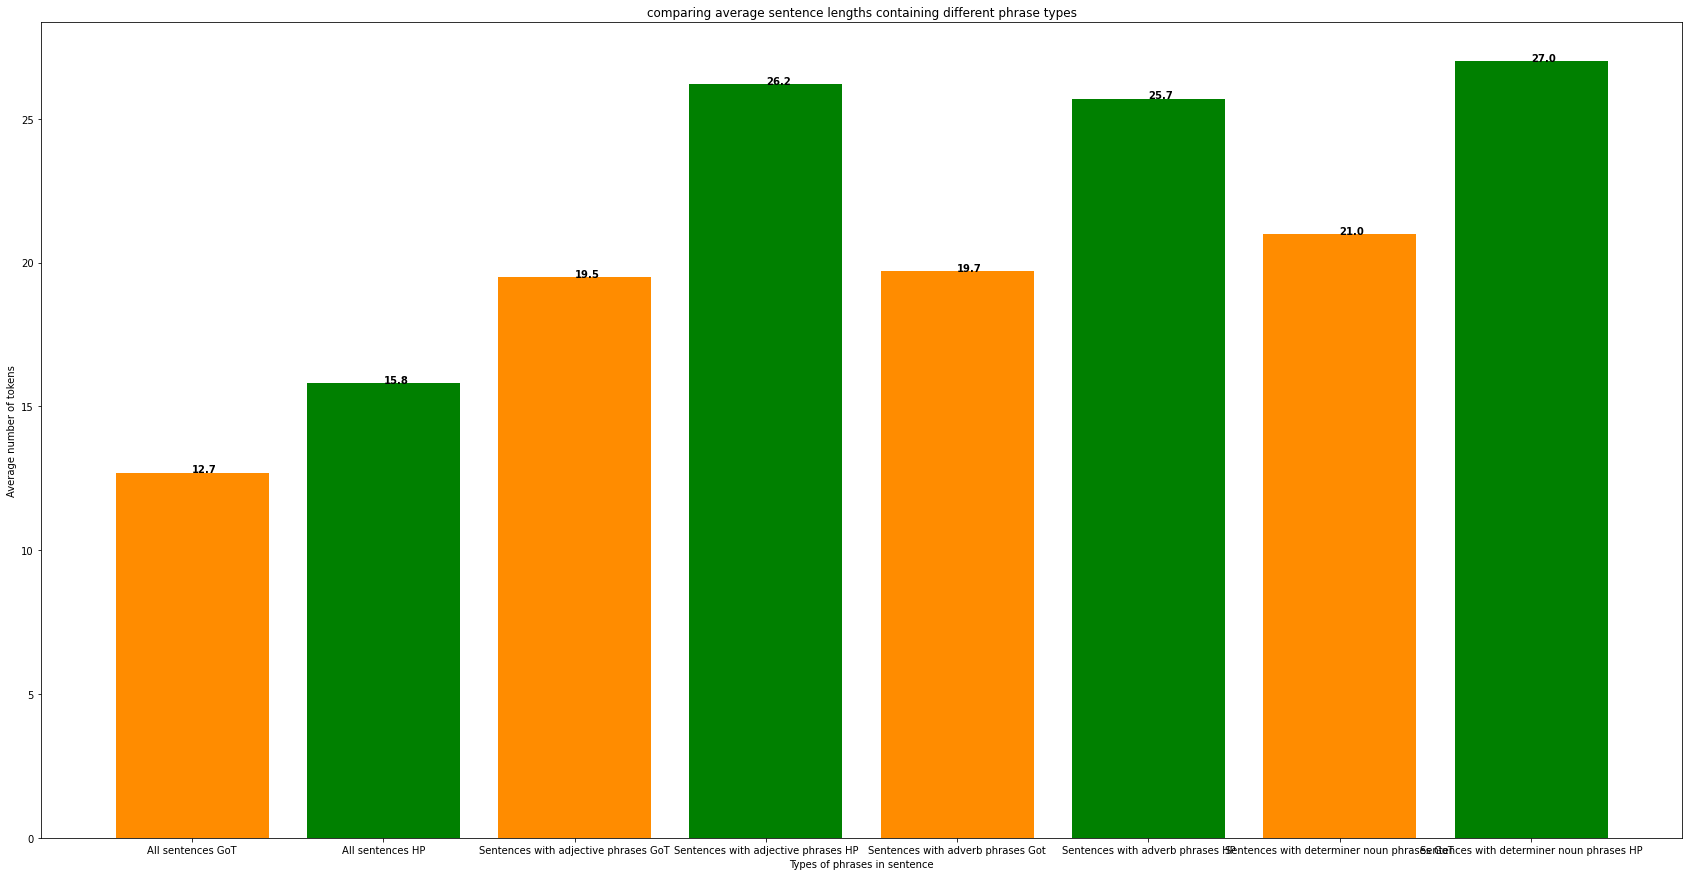

In [146]:
import matplotlib.pyplot as plt

#function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i],fontweight = 'bold')


values =  avg_sents
names = ['All sentences GoT'
         ,'All sentences HP'
         ,'Sentences with adjective phrases GoT'
         ,'Sentences with adjective phrases HP'
         ,'Sentences with adverb phrases Got'
         ,'Sentences with adverb phrases HP'
         ,'Sentences with determiner noun phrases GoT'
         ,'Sentences with determiner noun phrases HP'
        ]
colors = ['darkorange','green','darkorange','green','darkorange','green','darkorange','green', ]
plt.figure(figsize=(100, 15))

plt.subplot(131)
plt.bar(names
       ,values
        , color = colors
       )
plt.ylabel('Average number of tokens')
plt.xlabel('Types of phrases in sentence')
plt.title('comparing average sentence lengths containing different phrase types')
addlabels(values)
plt.show()

Overall, the average sentence length in Game of Thrones was found to be lower than that of Harry Potter.  Any sentence that contained one of the phrase types (adjective phrase, adverb phrase, determiner noun phrase) was also much longer than that of the average sentence length found in the book.  

# Top 50 tokens by POS tags

Code obtained from the code suggestion was altered to find the top 50 tokens of a type of POS tag from each book.  The tags used were all adjectives, all adverbs, all nouns, and all verbs.  The code creates an empty list and using a loop checks the tuples in each sentence to see if its pos matches a predetermined list if there is a match it is added to the empty list the using nltk freqdist and most common the 50 with the highest number of occurrences are pulled out and displayed.

In [147]:
# Top 50 adjective tokens

got_adjective_tokens = []
for sentence in tagged_got_text:
    for word, pos in sentence:
        if pos in ['JJ', 'JJR', 'JJS']: # adjective, comparative, superlative
            if len(word)>1:
                got_adjective_tokens.append(word)
got_freq_adjective = nltk.FreqDist(got_adjective_tokens)

for word, freq in got_freq_adjective.most_common(50):
    print(word,freq)

black 354
old 306
other 256
dead 241
long 235
last 233
own 230
more 223
little 218
good 218
great 201
red 193
first 182
white 178
high 174
small 167
hard 150
many 131
young 124
few 117
cold 116
heavy 114
much 110
true 105
strong 102
sweet 98
certain 95
deep 93
soft 89
full 87
dark 87
same 84
better 84
golden 83
new 83
pale 80
open 74
afraid 73
tall 72
thick 70
green 70
best 69
big 69
only 69
second 67
safe 67
wrong 66
low 65
right 64
hundred 63


The adjective from the adjective phrases that were most prominent were many, much, and afraid. These show in the top 50 adjectives but are not near the top.  When looking at the adjective alone afraid can be a very negative item but when looking at the phrases not afraid is present which negates the negative value. Also so afraid which amplifies the negativity.  

In [148]:
# Top 50 adjective tokens

hp_adjective_tokens = []
for sentence in tagged_hp_text:
    for word, pos in sentence:
        if pos in ['JJ', 'JJR', 'JJS']: # adjective, comparative, superlative
            if len(word)>1:
                hp_adjective_tokens.append(word)
hp_freq_adjective = nltk.FreqDist(hp_adjective_tokens)

for word, freq in hp_freq_adjective.most_common(50):
    print(word,freq)

ve 116
ll 94
other 88
first 84
last 82
next 82
little 67
good 66
re 63
more 59
old 56
few 55
large 51
black 48
long 45
great 45
much 44
open 43
new 36
same 36
full 36
sure 33
small 32
high 32
own 32
second 31
only 31
right 31
whole 30
white 30
big 28
dark 28
better 27
bad 27
able 26
best 26
many 26
past 25
green 25
red 23
common 22
cold 21
empty 21
unicorn 21
strange 20
famous 20
huge 20
horrible 20
stupid 19
dead 19


Harry Potter similairly follows the same as Game of Thrones when comparing the top adjective vs the top adjective phrases.  One major difference is a top adjective from the adjective phrases is angry which doesn't appear in the top 50 adjective at all.

In [149]:
# Top 50 adverb tokens

got_adverb_tokens = []
for sentence in tagged_got_text:
    for word, pos in sentence:
        if pos in ['RB', 'RBR', 'RBS']: # adverb, comparative, superlative
            if len(word)>1:
                got_adverb_tokens.append(word)
got_freq_adverb = nltk.FreqDist(got_adverb_tokens)

for word, freq in got_freq_adverb.most_common(50):
    print(word,freq)

not 1839
so 640
n't 617
back 487
now 437
as 412
here 399
never 384
only 379
too 351
well 337
even 326
away 323
still 294
then 281
again 274
more 231
yet 228
there 227
down 223
once 196
ever 188
enough 179
just 148
always 142
long 139
far 132
almost 126
up 123
Even 121
Then 108
very 105
alone 101
together 97
soon 85
Yet 84
much 83
Now 83
Perhaps 79
Not 76
forward 75
So 74
perhaps 68
truly 66
Only 65
first 64
scarcely 64
close 62
hard 62
else 61


When looking at the 50 top adjective phrases the adverbs found in Game of Thrones were so, not, more, and as, while they all appear there are others that rank higher that show the use of adverbs outside of adjective phrases.  Looking at the 50 top adverb phrases there is a lot of "not" and "as" along with "much" and "enough" these all are found on the list of adverbs but can be hard to comprehend individually. Enough is the prime example.  Having enough is good but what adverb proceeds enough changes the meaning directly. Examples would be "soon enough" vs "long enough" the adverb proceeding enough changes the entire meaning of the word.

In [150]:
# Top 50 adverb tokens

hp_adverb_tokens = []
for sentence in tagged_hp_text:
    for word, pos in sentence:
        if pos in ['RB', 'RBR', 'RBS']: # adverb, comparative, superlative
            if len(word)>1:
                hp_adverb_tokens.append(word)
hp_freq_adverb = nltk.FreqDist(hp_adverb_tokens)

for word, freq in hp_freq_adverb.most_common(50):
    print(word,freq)

not 208
back 194
just 157
very 156
so 147
now 124
then 117
never 111
here 111
there 110
again 101
too 98
even 90
still 88
as 76
up 75
down 71
only 70
really 70
away 68
suddenly 66
once 66
ever 55
well 50
more 49
Then 48
almost 47
quickly 44
right 44
already 43
Now 41
later 40
always 38
else 37
around 35
quite 32
forward 32
enough 31
much 29
nearly 28
Well 27
long 26
Not 26
ve 25
ll 25
yet 25
So 24
somewhere 23
far 22
rather 22


When looking at the 50 top adjective phrases the adverbs found in Harry Potter very and too.  Unlike Game of Thrones these are not at the top of the list.  The same ideas for adverb phrases vs adverbs hold true with the Harry Potter text.

In [151]:
# Top 50 noun tokens

got_noun_tokens = []
for sentence in tagged_got_text:
    for word, pos in sentence:
        if pos in ['NN','NNS','NNP','NNPS']: # Nouns, Singular, Plural, proper Singular, proper Plural
            if len(word)>1:
                got_noun_tokens.append(word)
got_freq_noun = nltk.FreqDist(got_noun_tokens)

for word, freq in got_freq_noun.most_common(50):
    print(word,freq)

Ser 948
Lord 889
Jon 817
Ned 783
man 770
Tyrion 606
eyes 558
Bran 536
men 505
father 501
Catelyn 479
king 474
Arya 437
hand 429
brother 424
face 422
Sansa 415
Dany 410
Robb 406
Robert 403
lord 402
boy 398
Stark 392
time 391
head 372
Lannister 344
sword 326
way 303
voice 299
blood 286
son 281
night 258
day 258
Maester 255
horse 245
Winterfell 236
hair 224
Drogo 219
King 215
Joffrey 215
years 210
feet 209
hands 208
gods 196
door 191
fingers 187
words 181
girl 177
knight 176
queen 175


In [152]:
# Top 50 noun tokens

hp_noun_tokens = []
for sentence in tagged_hp_text:
    for word, pos in sentence:
        if pos in ['NN','NNS','NNP','NNPS']: # Nouns, Singular, Plural, proper Singular, proper Plural
            if len(word)>1:
                hp_noun_tokens.append(word)
hp_freq_noun = nltk.FreqDist(hp_noun_tokens)

for word, freq in hp_freq_noun.most_common(50):
    print(word,freq)

Harry 1324
Ron 428
Hagrid 369
Hermione 266
Professor 179
Snape 170
Dumbledore 151
Dudley 139
Malfoy 126
something 121
time 118
Neville 117
Vernon 115
Quirrell 113
Uncle 111
door 105
eyes 104
McGonagall 100
Potter 95
way 93
head 91
room 88
people 86
face 83
Gryffindor 82
Mr. 79
Hogwarts 75
boy 71
anything 69
hand 67
school 65
wand 60
Stone 60
voice 59
day 58
bit 57
Petunia 57
Quidditch 57
Dursley 55
Wood 55
ter 54
Filch 54
Oh 53
Aunt 52
things 51
feet 51
years 50
didn 50
look 50
Dursleys 49


The top noun tokens are very different than the nouns found in the determiner nouns phrases.  The top nouns here are characters and places.  Where the determiner noun phrases were mostly titles, objects, and deeper look into the actual environment the books took place in.  The determiner noun phrases show mood and setting. The top nouns give a sense of who the book is about and the name of the locations the book takes place in.

In [153]:
# Top 50 Verb tokens

got_verb_tokens = []
for sentence in tagged_got_text:
    for word, pos in sentence:
        if pos in ['VB','VBG','VBD','VBN','VBP','VBZ']: # verbs, Singular, gerund, 
            #past tense, present tense not 3rd person singular,present tense 3rd person singular 
            if len(word)>1:
                got_verb_tokens.append(word)
got_freq_verb = nltk.FreqDist(got_verb_tokens)

for word, freq in got_freq_verb.most_common(50):
    print(word,freq)

was 3890
had 2855
said 1946
is 1354
have 1144
were 1115
be 1082
do 714
been 675
are 667
did 653
told 494
see 479
's 456
know 414
looked 403
made 360
took 337
came 324
saw 311
has 302
thought 294
asked 277
say 274
come 272
take 260
go 259
want 250
knew 250
went 248
gave 242
make 239
heard 238
seemed 224
turned 218
am 210
found 206
called 203
left 191
think 190
tell 187
gone 187
felt 182
stood 178
let 176
hear 174
done 173
're 170
'm 167
put 166


In [154]:
# Top 50 Verb tokens

hp_verb_tokens = []
for sentence in tagged_hp_text:
    for word, pos in sentence:
        if pos in ['VB','VBG','VBD','VBN','VBP','VBZ']:  # verbs, Singular, gerund, 
            #past tense, present tense not 3rd person singular,present tense 3rd person singular
            if len(word)>1:
                hp_verb_tokens.append(word)
hp_freq_verb = nltk.FreqDist(hp_verb_tokens)

for word, freq in hp_freq_verb.most_common(50):
    print(word,freq)

was 1179
said 793
had 696
be 360
were 304
have 288
been 211
got 192
know 180
get 169
looked 169
is 164
do 149
see 148
didn 138
are 136
going 134
think 115
don 110
go 110
looking 98
did 91
told 88
thought 82
couldn 79
turned 77
came 75
say 72
seemed 72
went 71
want 69
found 68
come 67
made 66
left 64
trying 64
knew 61
tried 61
saw 61
heard 60
tell 59
asked 59
took 59
put 58
take 58
look 54
seen 53
wasn 53
pulled 52
let 52


# Top 10 word type frequncy distrubution comparison

Using an empty dictionary, the 10 tokens of each type (adjective, adverb, noun, and verb) were obtained and placed in with key being the word and the value being the number of occurrence in the book.  Each dictionary was then taken, and the keys were placed into a list and the values into another list.  The lists were then graphed for a visual comparison of the two books most common tokens of each type (adjective, adverb, noun, and verb).  This was done for each book.

In [155]:
#creating a dict of the top 10 adjectives 
got_adj_dict = {}
for word, freq in got_freq_adjective.most_common(10):
    x=word
    y=freq
    got_adj_dict.update({x:y})
got_adj_dict

{'black': 354,
 'old': 306,
 'other': 256,
 'dead': 241,
 'long': 235,
 'last': 233,
 'own': 230,
 'more': 223,
 'little': 218,
 'good': 218}

In [156]:
#creating a dict of the top 10 adverbs
got_adv_dict = {}
for word, freq in got_freq_adverb.most_common(10):
    x=word
    y=freq
    got_adv_dict.update({x:y})
got_adv_dict

{'not': 1839,
 'so': 640,
 "n't": 617,
 'back': 487,
 'now': 437,
 'as': 412,
 'here': 399,
 'never': 384,
 'only': 379,
 'too': 351}

In [157]:
#creating a dict of the top 10 nouns
got_noun_dict = {}
for word, freq in got_freq_noun.most_common(10):
    x=word
    y=freq
    got_noun_dict.update({x:y})
got_noun_dict

{'Ser': 948,
 'Lord': 889,
 'Jon': 817,
 'Ned': 783,
 'man': 770,
 'Tyrion': 606,
 'eyes': 558,
 'Bran': 536,
 'men': 505,
 'father': 501}

In [158]:
#creating a dict of the top 10 verbs
got_verb_dict = {}
for word, freq in got_freq_verb.most_common(10):
    x=word
    y=freq
    got_verb_dict.update({x:y})
got_verb_dict

{'was': 3890,
 'had': 2855,
 'said': 1946,
 'is': 1354,
 'have': 1144,
 'were': 1115,
 'be': 1082,
 'do': 714,
 'been': 675,
 'are': 667}

In [159]:
#combining the keys (word tokens) from each dict into a list
got_freq_dist_key = []
for key in got_adj_dict.keys():
    got_freq_dist_key.append(key)
    
for key in got_adv_dict.keys():
    got_freq_dist_key.append(key)
    
for key in got_noun_dict.keys():
    got_freq_dist_key.append(key)
    
for key in got_verb_dict.keys():
    got_freq_dist_key.append(key)

In [160]:
#combining the values (frequency) from each dict into a list
got_freq_dist_value = []
for value in got_adj_dict.values():
    got_freq_dist_value.append(value)
    
for value in got_adv_dict.values():
    got_freq_dist_value.append(value)
    
for value in got_noun_dict.values():
    got_freq_dist_value.append(value)
    
for value in got_verb_dict.values():
    got_freq_dist_value.append(value)

In [161]:
#creating a dict of the top 10 adjectives 
hp_adj_dict = {}
for word, freq in hp_freq_adjective.most_common(10):
    x=word
    y=freq
    hp_adj_dict.update({x:y})
hp_adj_dict

{'ve': 116,
 'll': 94,
 'other': 88,
 'first': 84,
 'last': 82,
 'next': 82,
 'little': 67,
 'good': 66,
 're': 63,
 'more': 59}

In [162]:
#creating a dict of the top 10 adverbs
hp_adv_dict = {}
for word, freq in hp_freq_adverb.most_common(10):
    x=word
    y=freq
    hp_adv_dict.update({x:y})
hp_adv_dict

{'not': 208,
 'back': 194,
 'just': 157,
 'very': 156,
 'so': 147,
 'now': 124,
 'then': 117,
 'never': 111,
 'here': 111,
 'there': 110}

In [163]:
#creating a dict of the top 10 nouns
hp_noun_dict = {}
for word, freq in hp_freq_noun.most_common(10):
    x=word
    y=freq
    hp_noun_dict.update({x:y})
hp_noun_dict

{'Harry': 1324,
 'Ron': 428,
 'Hagrid': 369,
 'Hermione': 266,
 'Professor': 179,
 'Snape': 170,
 'Dumbledore': 151,
 'Dudley': 139,
 'Malfoy': 126,
 'something': 121}

In [164]:
#creating a dict of the top 10 verbs
hp_verb_dict = {}
for word, freq in hp_freq_verb.most_common(10):
    x=word
    y=freq
    hp_verb_dict.update({x:y})
hp_verb_dict

{'was': 1179,
 'said': 793,
 'had': 696,
 'be': 360,
 'were': 304,
 'have': 288,
 'been': 211,
 'got': 192,
 'know': 180,
 'get': 169}

In [165]:
#combining the keys (word tokens) from each dict into a list
hp_freq_dist_key = []
for key in hp_adj_dict.keys():
    hp_freq_dist_key.append(key)
    
for key in hp_adv_dict.keys():
    hp_freq_dist_key.append(key)
    
for key in hp_noun_dict.keys():
    hp_freq_dist_key.append(key)
    
for key in hp_verb_dict.keys():
    hp_freq_dist_key.append(key)

In [166]:
#combining the values (frequency) from each dict into a list
hp_freq_dist_value = []
for value in hp_adj_dict.values():
    hp_freq_dist_value.append(value)
    
for value in hp_adv_dict.values():
    hp_freq_dist_value.append(value)
    
for value in hp_noun_dict.values():
    hp_freq_dist_value.append(value)
    
for value in hp_verb_dict.values():
    hp_freq_dist_value.append(value)

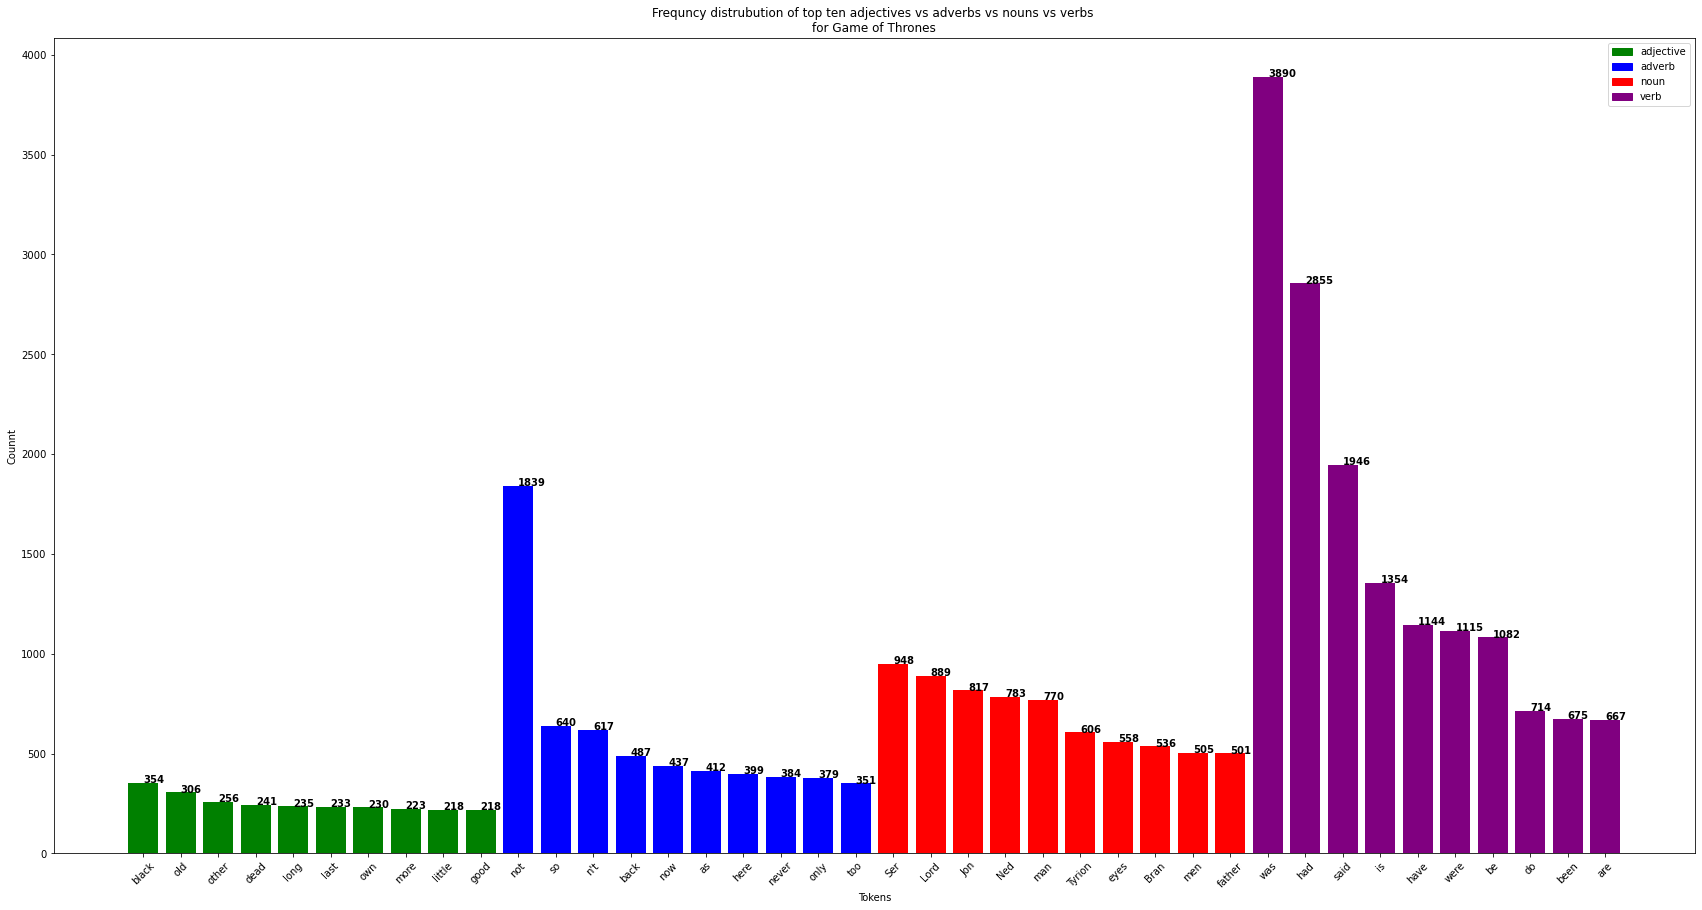

In [167]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i],fontweight = 'bold')

names = got_freq_dist_key
values = got_freq_dist_value


colors = ['green','green','green','green','green','green','green','green','green','green',
         'blue','blue','blue','blue','blue','blue','blue','blue','blue','blue',
         'red','red','red','red','red','red','red','red','red','red',
         'purple','purple','purple','purple','purple','purple','purple','purple','purple','purple',]





plt.show()
# legend manually added
l1 = mpatches.Patch(color='green', label='adjective')
l2 = mpatches.Patch(color='blue', label='adverb')
l3 = mpatches.Patch(color='red', label='noun')
l4 = mpatches.Patch(color='purple', label='verb')




plt.figure(figsize=(100, 15))
location = 0 # For the best location
legend_drawn_flag = True

plt.subplot(131)
plt.bar(names
       ,values
        , color = colors
       )
plt.xticks(rotation= 45)
plt.ylabel('Counnt')
plt.xlabel('Tokens')
plt.title('Frequncy distrubution of top ten adjectives vs adverbs vs nouns vs verbs \nfor Game of Thrones')
addlabels(values)
plt.legend(handles=[l1, l2, l3,l4], loc=0)
plt.show()

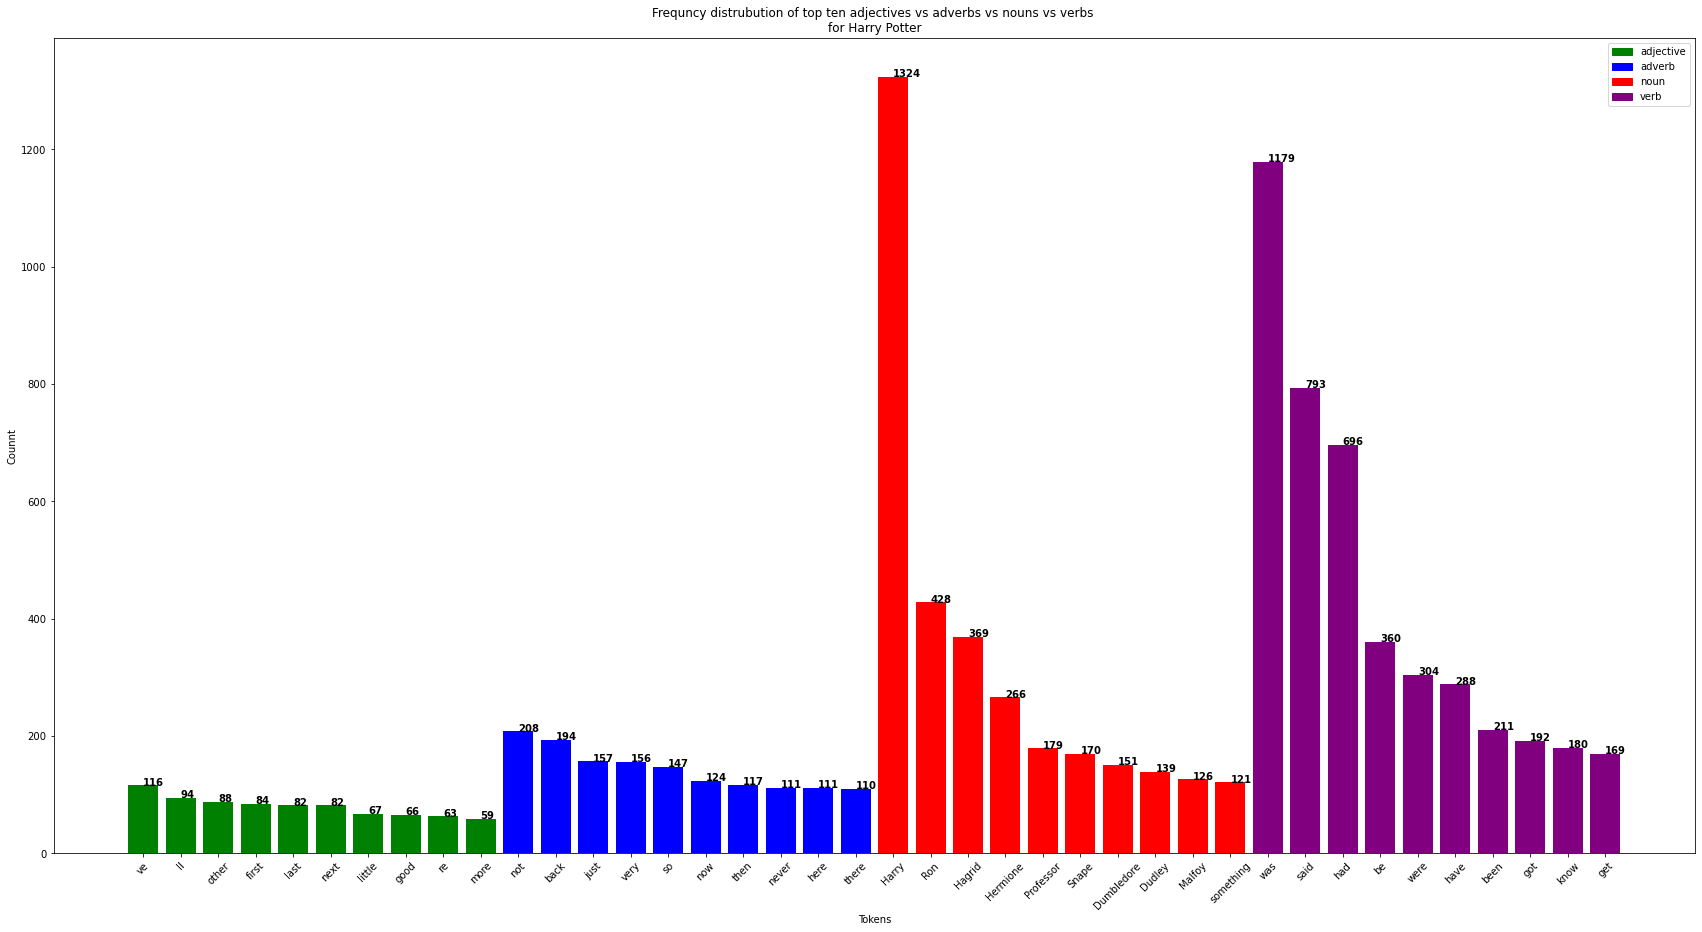

In [168]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i],fontweight = 'bold')

names = hp_freq_dist_key
values = hp_freq_dist_value


colors = ['green','green','green','green','green','green','green','green','green','green',
         'blue','blue','blue','blue','blue','blue','blue','blue','blue','blue',
         'red','red','red','red','red','red','red','red','red','red',
         'purple','purple','purple','purple','purple','purple','purple','purple','purple','purple',]





plt.show()
# manually adding a legend
l1 = mpatches.Patch(color='green', label='adjective')
l2 = mpatches.Patch(color='blue', label='adverb')
l3 = mpatches.Patch(color='red', label='noun')
l4 = mpatches.Patch(color='purple', label='verb')




plt.figure(figsize=(100, 15))
location = 0 # For the best location
legend_drawn_flag = True

plt.subplot(131)
plt.bar(names
       ,values
        , color = colors
       )
plt.xticks(rotation= 45)
plt.ylabel('Counnt')
plt.xlabel('Tokens')
plt.title('Frequncy distrubution of top ten adjectives vs adverbs vs nouns vs verbs \nfor Harry Potter')
addlabels(values)
plt.legend(handles=[l1, l2, l3,l4], loc=0)
plt.show()

When comparing the top ten words of each type between Game of Thrones and Harry Potter there are a few large differences. The use of not in Game of Thrones is very high and is an outlier compared to the rest of the adverbs.  For Harry Potter there is a extremely high usage of the word Harry in nouns.  The usage of Harry is to be expected but the word not showing up at such a high amount could indicate that Game of Thrones would be very hard to use sentiment analysis on because of the constant amount of negation.  Although this does afford a good opportunity to try different ways of using not as a way to accomplish sentiment analysis with negation.

# Sentiment Recommendations

For Sentiment analysis when an adjective is used as a predictor such as “nasty” giving a negative sentiment, if the adjective is part of an adjective phrase such as “very nasty” the score could contain a weight making this negative score higher.  This would give a more accurate score.   The adverbs in particular should be taken into account as they are increasing the sentiment.  Examples are “very nasty” “too old” “very painful”, “more dangerous”, “more important”.  The adverbs are also used to negate sentiment.  Some examples are “not” and “never”.  Adverbs also change the sentiment such as “yet” and “still”.   Possibly assigning a -1 score to not or never to be used in conjunction with its pairing token could give a better sentiment score.  If ugly is neg score of 0.5 and the text says not ugly it could give negative score of -.5 reducing the negative score overall.  If the sentiment was conducted with these POS adjective phrases inplace of the times when it is just the adjective the results would be more realistic.  For instance instead of "afraid" the use of "so afraid" and "not afraid" was looked for first and given different value scores then the sentiment analysis looked for afraid a better overall score would be found. 

With adverb phrases the use of two adverbs together often counter act one another.  Examples include “not even”, “not so” “not quite”, “yet still”, “not just”.  This can be explained using a longer example such as “He worked out, yet still he was skinny”. Since this example has worked as possibly being positive and skinny being positive the sentiment would be positive, the use of "yet still" changes the context of the sentence to being negative.  The list of adverb phrases should be cut down but given a negation ability to change the overall sentiment of a sentence.    

When finding tokens that represent the text it seems prudent to consider the distribution of tags.  While still considering which types of words will affect sentiment.  The tag distribution should be similar and the important part of speech that indicates sentiment should be highly valued.  Using weights to amplify specific phrases that occur and negators to reduce score when a token is being contradicted in the text such as “not ugly”.  Lastly I would recommend a careful look at Game of Thrones because of the extesive amount of the word not appearing in the text.